# Plotting Data on MPAS Native Grid<a id="top"></a>


This notebook shows how to plot MPAS native grids

Modified scripts following the examples developed by Charles Doutriaux. (April 2018)

see: https://github.com/CDAT/e3sm_nex

## Table Of Contents

* [necessary modules for this notebook](#modules)
* [download necessary files](#download)
* [read grid data](#read_grid)
* [generate MPAS grid](#grid)
* [load data and apply grid](#data)
* [plot the data](#plot)

## Necessary Modules<a id="modules"></a>
[Back to Top](#top)

In [1]:
from __future__ import print_function
import e3sm_nex
import cdms2
import vcs
import requests
import numpy

## Download Data<a id="download"></a>
[Back to Top](#top)

In [2]:
def download(fnm):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/%s" % fnm,stream=True)
    with open(fnm,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)
                
for filename in ["ocean.oEC60to30v3.scrip.161222.nc", "mpas_sample.nc"]:
    download(filename)
    
    
data_path = "mpas_sample.nc"
grid_file_path = "ocean.oEC60to30v3.scrip.161222.nc"

## Grid Info<a id="read_grid"></a>
[Back to Top](#top)

In [3]:
# Reads in data from grid file
gf = cdms2.open(grid_file_path)

# needs to send filled data
lats = gf("grid_center_lat").filled()
lons = gf("grid_center_lon").filled()

lat_corners = gf("grid_corner_lat").filled()
lon_corners = gf("grid_corner_lon").filled()

## Generate MPAS Grid<a id="grid"></a>
[Back to Top](#top)

In [4]:
# Generate grid
grid = e3sm_nex.generateMPASGrid(lats, lons, lat_corners, lon_corners)

## Load Data and Apply Grid<a id="data"></a>
[Back to Top](#top)

In [5]:
# Load data and apply grid
fd = cdms2.open(data_path)
data = fd("timeMonthly_avg_activeTracers_temperature")
# Need to clean up missing/bad values
data = cdms2.MV2.masked_greater(numpy.abs(data),1.e20)
data = e3sm_nex.applyGrid(data,grid)

## Plot<a id="plot"></a>
[Back to Top](#top)

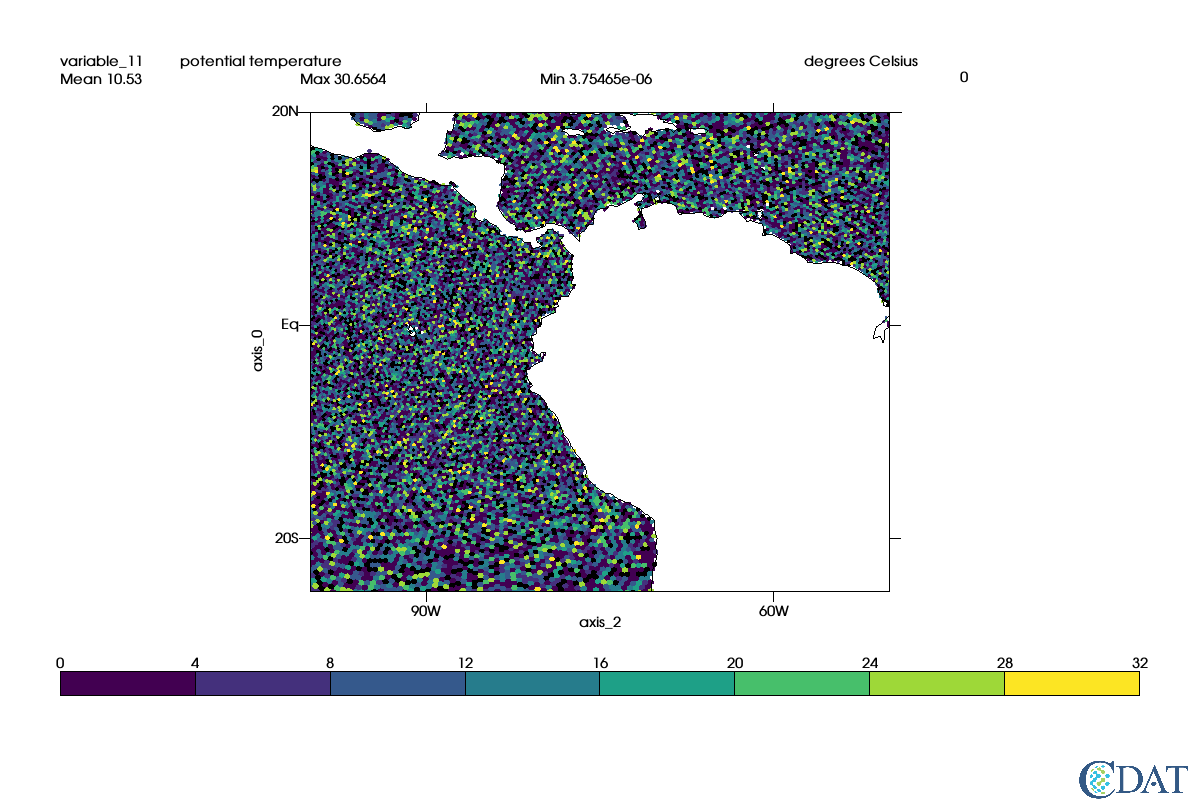

In [7]:
# plot
# create Canvas
x=vcs.init(bg=True, geometry=(1200,800))

# Create graphics method
mesh = vcs.createmeshfill()

# Only show a sub domain
mesh.datawc_x1 = -100
mesh.datawc_x2 = -50
mesh.datawc_y1 = -25
mesh.datawc_y2 = 20

# If you want to show mesh
# mesh.mesh = True

x.plot(data, mesh, ratio="autot")

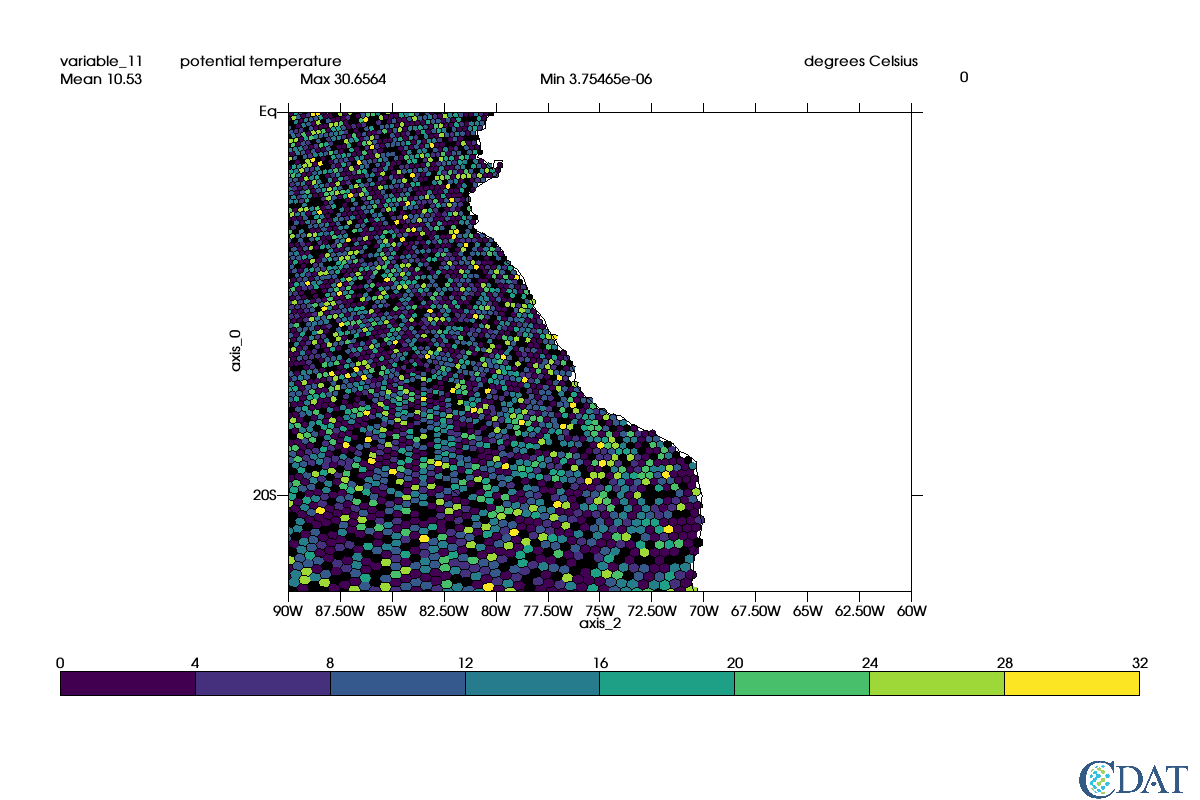

In [9]:
# plot
# create Canvas
x=vcs.init(bg=True, geometry=(1200,800))

# Create graphics method
mesh = vcs.createmeshfill()

# Only show a sub domain
mesh.datawc_x1 = -90
mesh.datawc_x2 = -60
mesh.datawc_y1 = -25
mesh.datawc_y2 = 0

# If you want to show mesh
mesh.mesh = True

x.plot(data, mesh, ratio="autot")